In [1]:
from turbo import TurboM
import numpy as np
import torch
import math
import matplotlib
import matplotlib.pyplot as plt

In [4]:
a = -5 * np.ones(3)
a.shape

(3,)

In [5]:
a

array([-5., -5., -5.])

In [7]:
np.asarray([-5,-5])

array([-5, -5])

In [8]:
a[0]

-5.0

In [9]:
class toy_objective_function:
    def __init__(self):
        self.dim = 2
        self.lb = np.asarray([-10,-10])
        self.ub = np.asarray([10,10])
        
    def __call__(self, x):
        assert len(x) == self.dim
        assert x.ndim == 1
        assert np.all(x <= self.ub) and np.all(x >= self.lb)
        
        #the turbom assumes a minimization problem
        val = (x[0]-5)**2+(x[1]-6)**2

        return val

In [10]:
f = toy_objective_function()

In [11]:


turbo_m = TurboM(
    f=f,  # Handle to objective function
    lb=f.lb,  # Numpy array specifying lower bounds
    ub=f.ub,  # Numpy array specifying upper bounds
    n_init=10,  # Number of initial bounds from an Symmetric Latin hypercube design
    max_evals=1000,  # Maximum number of evaluations
    n_trust_regions=5,  # Number of trust regions
    batch_size=10,  # How large batch size TuRBO uses
    verbose=True,  # Print information from each batch
    use_ard=True,  # Set to true if you want to use ARD for the GP kernel
    max_cholesky_size=2000,  # When we switch from Cholesky to Lanczos
    n_training_steps=100,  # Number of steps of ADAM to learn the hypers
    min_cuda=32,  # Run on the CPU for small datasets
    #device="cpu",  # "cpu" or "cuda"
    device = "cuda",
    dtype="float64",  # float64 or float32
)

Using dtype = torch.float64 
Using device = cuda


In [12]:
turbo_m.optimize()

TR-0 starting from: 27.23
TR-1 starting from: 24.13
TR-2 starting from: 6.39
TR-3 starting from: 8.754
TR-4 starting from: 0.1447
60) New best @ TR-4: 0.05136
70) New best @ TR-3: 0.01498
90) New best @ TR-3: 0.002453
200) New best @ TR-3: 0.001587
210) New best @ TR-3: 0.0001616
240) TR-3 converged to: : 0.0001616
240) TR-3 is restarting from: : 5.467
270) TR-4 converged to: : 0.001528
270) TR-4 is restarting from: : 2.509
490) TR-1 converged to: : 0.006221
490) TR-1 is restarting from: : 3.134
500) TR-3 converged to: : 0.001463
500) TR-3 is restarting from: : 0.6122
550) TR-4 converged to: : 0.004631
550) TR-4 is restarting from: : 12.17
670) TR-0 converged to: : 0.0007278
670) TR-0 is restarting from: : 11.52
720) TR-3 converged to: : 0.000228
720) TR-3 is restarting from: : 20.51
770) TR-1 converged to: : 0.003422
770) TR-1 is restarting from: : 15.78
880) TR-2 converged to: : 0.0005119
880) TR-2 is restarting from: : 2.814
900) New best @ TR-0: 9.518e-05
930) TR-0 converged to: : 

In [13]:
X = turbo_m.X  # Evaluated points
fX = turbo_m.fX  # Observed values
ind_best = np.argmin(fX)
f_best, x_best = fX[ind_best], X[ind_best, :]

print("Best value found:\n\tf(x) = %.3f\nObserved at:\n\tx = %s" % (f_best, np.around(x_best, 3)))



Best value found:
	f(x) = 0.000
Observed at:
	x = [5.009 6.003]


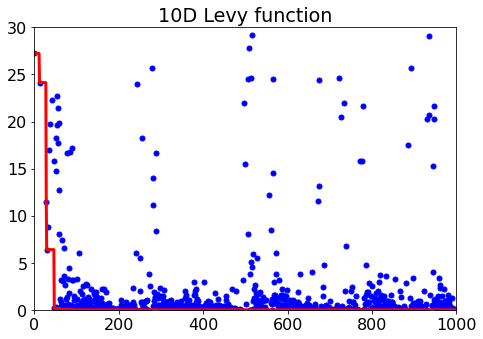

In [14]:
fig = plt.figure(figsize=(7, 5))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(fX, 'b.', ms=10)  # Plot all evaluated points as blue dots
plt.plot(np.minimum.accumulate(fX), 'r', lw=3)  # Plot cumulative minimum as a red line
plt.xlim([0, len(fX)])
plt.ylim([0, 30])
plt.title("10D Levy function")

plt.tight_layout()
plt.show()


In [15]:
init_search_space_dict = {
            'cov_para_1':[-0.9,0.9]
        }

In [16]:
init_search_space_dict

{'cov_para_1': [-0.9, 0.9]}

In [17]:
X = turbo_m.X  # Evaluated points
fX = turbo_m.fX  # Observed values
ind_best = np.argmin(fX)
f_best, x_best = fX[ind_best], X[ind_best, :]

print("Best value found:\n\tf(x) = %.3f\nObserved at:\n\tx = %s" % (f_best, np.around(x_best, 3)))



Best value found:
	f(x) = 0.000
Observed at:
	x = [5.009 6.003]


In [18]:
x_best

array([5.0091623 , 6.00335181])

In [19]:
x_best.shape

(2,)